In [1]:
# This notebook is used for visualizing and understanding deep feaures

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import torch
from torch.autograd import Variable
import sys
sys.path.append('..')
import vgg

import utils
from scipy import misc,ndimage
import tools
import imageio
import skimage

In [2]:
img1 = imageio.imread('img_ScaleChange/0003.jpg')
img2 = imageio.imread('img_common/0001.jpg')
img3 = imageio.imread('../example.jpg')

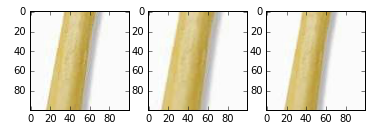

In [3]:
img = img3

img_m = utils.get_subwindow(img,pos=[150.,200.],sz=np.array([244,244]))
img_s = utils.get_subwindow(img,pos=[212.,212.],sz=np.array([100,100]),
                            scale_factor=0.9)
img_l = utils.get_subwindow(img,pos=[212.,212.],sz=np.array([100,100]),
                            scale_factor=1.1)
plt.subplot(141)
plt.imshow(img)
plt.subplot(142)
plt.imshow(img_m)
plt.subplot(143)
plt.imshow(img_s)
plt.subplot(144)
plt.imshow(img_l)

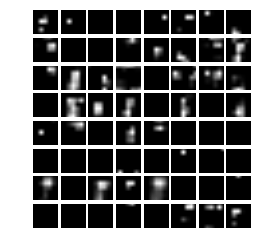

In [4]:
# network init

model = vgg.VGG_19()

# load partial weights
model_dict = model.state_dict()
params = torch.load('vgg19.pth')
load_dict = {k:v for k,v in params.items() if 'features' in k}
model_dict.update(load_dict)
model.load_state_dict(model_dict)

# extract features

imgMean = np.array([0.485, 0.456, 0.406], np.float)
imgStd = np.array([0.229,0.224,0.225])
img_m = skimage.transform.resize(img_m,(224,224,3), mode = 'reflect')
img_m = (img_m-imgMean)/imgStd
img_m = np.transpose(img_m, (2,0,1))
feature2 = model(Variable(torch.from_numpy(img_m[None,:,:,:]).float()))
feature = feature2[0].data[0].numpy()
x = ndimage.zoom(feature, (1, float(100)/feature.shape[1],
                           float(100)/feature.shape[2]), order=1)
tools.imshow_grid(x,shape=[8,8])